In [10]:
#  The Following is a tutorial for plotting color magnitude diagrams for galaxy
#  groups using simple python code, and Jupyter notebooks.

#  The first thing to do is to make sure the data that you are using is in a 
#  readable file by the code.  In my case, I saved everything as a csv file.
#  You can also read in .fits files and .ascii files, which may be more preferable
#  and may save you the headache of why your data is ambiguous to the compiler.
#  Another thing to keep in mind is that none of your column headers contain
#  any logic operators such as +,-,or =, as you will recieve an error when you
#  try to read that data into your code.

#  To avoid having to write out the path names to your file, it is easier to 
#  save all of your data files into the same as the file that you are trying
#  to acsess this data with.

#  When you've done that, you can open Jupyter.  This can be done from the terminal
#  from the directory where all of your files live.  For me, all of my files 
#  where in a directory named GOGREEN under Documents.  So you cd to that directory
#  then from that directory, type:  jupyter notebook

#  From the browser that it brings up, you can create a new notebook by clicking 
#  the "new" tab and clicking "python 3"  to write your code using python.  You
#  can start typing your code into the empty cell that it gives you.  To rename
#  your file, you can click on the title at the top, which will initially say
#  something like "untitled," and type whatever you want as the title.  This 
#  should preferably be something descriptive as to what you are doing.  You
#  can add new cells and run your code from the taskbar at the top, but keep in
#  mind that every time you try to run a cell before a cell that has relevant
#  information to your current cell, you will get an error.

#  Now that you have all of your data where you need it and are in a new notebook
#  you can import the libraries that you will need for running your code.  The 
#  three main libraries you will need is pandas, numpy, and pyplot from matplotlib.
#  If you are reading in your data through .ascii or .fits files, you will need 
#  to import ascii or fits respectively from astropy.io.  As an example, I have 
#  the following code to import what I will need:


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#  you can also, in addition, add:

from astropy.io import ascii
from astropy.io import fits 

#  Which is unused by me in this code.
#  For this code, I need pandas to read in the data from my files.  I need numpy
#  to bring in certain mathematical functions and array functions.  The main
#  functions are log10, zeroes, and where.  Pyplot will present to us all of
#  the plotting tools you will need.

#  I use four different files with relevant data.  To read these files, I give
#  the file a name to use in my code, then set it equal to the relevant read-in
#  function.  Reading in the csv files, you need pandas.read_csv('file_name.csv')
#  since I have imported pandas as pd, the code will look like:



UVJinfo = pd.read_csv('UBVJ_MASTER_SPTCL_0205.csv')
KJzRinfo = pd.read_csv('SPTCL_0205_totalall_FOURSTARKs_photom.csv')
SPECZ_Match = pd.read_csv('SPTCL_0205_SPECZ_MATCHED.csv')
clusterinfo = pd.read_csv('clusterzinfo.csv')


#  UBVJ_MASTER_SPTCL_0205.csv contains all relevant U-V and V-J data as well as
#  the relevant redshift data for each galaxy in this file.  UVJinfo is the
#  file code name for this .csv file.  

#  The file code name KJzRinfo holds all of the information
#  for fluxes in the J, z, R, and K band, as well as the information needed
#  for the cluster member selection criteria relating to mask and k_star.  Mask
#  has something to do with whether or not the given object was in the mask at
#  the time of data extraction and K-star is a parameter from 0-1 that tells 
#  how likely the object is of being a star rather than a galaxy will values 
#  closer to 1 being more likely to be a star than a galaxy.  

#  SPECZ_Match has all of the source quality information for the GOGREEN project.
#  The source indicator says which survey that this information came from and 
#  the quality indicator says whether or not this object is good, based on the 
#  source.  For GOGREEN (Source = 1), the good quality flags are 3 and 4.
#  source(1=GOGREEN,2=GCLASS,3=SPT,4=FORS2,5=NED)

#  Finally, clusterinfo has the information for a groups specific redshift for,
#  which the cluster member selection criteria is based.  More on this later.



#  Now that I have all of my data files read in, it's time to read in all of 
#  the individual data.  For this, you will need to know what your data files
#  call this data.  Then you choose a name for you data in the code.  To extract
#  this information, and store it in an array of your given name, you type:

#  chosen_data_name = file_code_name.original_name_of_data.  For my data, all
#  of my data is pulled into my code as follows:


ID = KJzRinfo.id
k_flux = KJzRinfo.FOURSTARKs_tot
R_flux = KJzRinfo.VIMOSR
z_flux = KJzRinfo.VIMOSz
J_flux = KJzRinfo.FOURSTARJ
k_star = KJzRinfo.K_star
mask = KJzRinfo.totmask
IDUVJ = UVJinfo.PHOTID
CLUSTERZ = UVJinfo.CLUSTERZ
indivz = UVJinfo.INDIVZ
U_V = UVJinfo.U_V
V_J = UVJinfo.V_J
source = SPECZ_Match.source
quality = SPECZ_Match.quality
specZ = SPECZ_Match.spec_z
redshift = clusterinfo.Redshift


#  I now have all of my relevant data stored into arrays, which I can now call
#  by the name that I have given to each set of data.


#  The following parameter is the Cluster Redshift from Balough et al. for this
#  particular cluster SPTCL 0205, where 4 indicates the fifth entry in the Redshift
#  column from the clusterinfo.csv file (indicies start from 0).

clustZ = redshift[4]



#  We now have to convert all of our fluxes into magnitudes.  This is done by:
#    filter_magnitue = -2.5log(filter_flux) + 25 
#  This specific formula is for AB magnitudes.

#  When assigning names to your magnitudes, its important to keep in mind that 
#  one cannot simply call this variable mag1-mag2, as this contains a mathematical
#  operator, and the compiler will not recognize this as a variable name.  This is
#  also where we will make our first call to the numpy library as it has the log10
#  function.  The following shows how this works:

J_K = 2.5*np.log10(k_flux/J_flux)
z_K = 2.5*np.log10(k_flux/z_flux)
R_K = 2.5*np.log10(k_flux/R_flux)
K = -2.5*np.log10(k_flux) + 25

#  where J_K is the J-K magnitude, z_K is the z-K magnitude, R_K is the R-K magnitude
#  and K is the K band magnitude.  This is taking every flux at a given index in the 
#  flux arrays and making a new number at that point, which is the magnitude.  These 
#  four parameters are now new arrays for my data with a one to one correspondance 
#  between the indicies.

#  This next part is where it gets a bit difficult, if you've read in your data the
#  way that I have.  The way that I read the data in has issues with the plotting functions
#  not reading my data, since it needs a multi index tuple, and the arrays that I have read-in
#  are only single index.  My solution was as follows:

#  I had produced a new tuple variable and constructed a for loop to construct new tuples
#  In numpy, there is a function called zeros that will produce for you a NxN array
#  of zeroes.  You can choose the length of each dimension creating the tuple.  You can
#  also choose the type of data that you want this new tuple to contain by using the
#  dtype variable.  This looks something like this:

#     new_tuple = np.zeros((number_of_rows,number_of_columns), dtype = data_type)

#  You can also fill this tuple with a for loop.  For example, this is how I produced
#  my new tuples:

a = 0
JMINK = np.zeros((len(k_star),1), dtype=float)
zMINK = np.zeros((len(k_star),1), dtype=float)
RMINK = np.zeros((len(k_star),1), dtype=float)
UMINV = np.zeros((len(k_star),1), dtype=float)
VMINJ = np.zeros((len(k_star),1), dtype=float)
KMAG = np.zeros((len(k_star),1), dtype=float)


for i in range(len(k_star)):
    JMINK[a]=J_K[i]
    zMINK[a]=z_K[i]
    RMINK[a]=R_K[i]
    UMINV[a]=U_V[i]
    VMINJ[a]=V_J[i]
    KMAG[a]=K[i]
    a=a+1


#  I wanted an Nx1 tuple to put store my data.  I chose the length of this tuple by
#  specifying that I wanted it to be as long as my k_star array.  This was arbitrary,
#  and I could have picked any variable to represent that I have already read in, as
#  these arrays are all the same length.  

#       The for loop

#  In python, a for loop needs an initial condition specified before the beginning of
#  the loop itself.  You have to specify some variable and set it equal to 0.  The loop
#  will then iterate over this number and increase its counter, until the given condition
#  is specified.  The condition for this loop is the range.  You can have your for
#  loop do other things that are more complicated, but of the sake of this code, I simplify
#  it to this.  This loop starts with the 0 index of an array, stores it into the empty
#  tuple in the same index, then moves on to the next index in the array.  This continues
#  until all of the indicies in the array have been looped over.  I now have a multi-index
#  tuple that I will be able to plot with using the where function.


#. This next portion will serve as a tutorial over the where and isnan functions from numpy.

#  The isnan function goes through an array and produces a boolean logic indicator saying
#. whether that perticular value is a NAN (not a number) or not.  You can also tell your
#. code that you do not want to use that value by typing ~ in front of the function.  This 
#. Will look something like:

#.     np.isnan(something_that_may_or_may_not_be_a_number) == True

#.  This will pick a value that is not a number.  The reverse is true if you do:

#.     ~np.isnan(something_that_may_or_may_not_be_a_number) == True

#  The where function sets specific conditions on a given index.  If you use this to set
#. constraints on a given index, you will only be given those indicies.  In other words,
#. this will return elements of an array or tuple based on the conditions you set.
#. This can look something like:

#.      good_index = np.where((condition_1) & (condition_2) | (condition_3))

#. so this kind of works like an if statement for indicies of a tuple/array. If the conditions
#  are satisfied, those indicies are used when you call upon it like:

#.      print(tuple[good_index])

#  This will print you off a list of the numbers in the nuple that made the cut.  To see this
#. in action, I have code that picks good values for each of my data sets that looks like:

goodJK = np.where((k_star < 0.97) & (mask ==0) & (~np.isnan(J_K) == True))
goodzK = np.where((k_star < 0.97) & (mask ==0) & (~np.isnan(z_K) == True))
goodRK = np.where((k_star < 0.97) & (mask ==0) & (~np.isnan(R_K) == True))
goodUVJ = np.where((k_star < 0.97) & (mask ==0))

#. These particular indicies select the objects in the survey with a mask of zero and a k_star
#  value less than 0.97.  This also rejects all values that are NAN's, as they will give errors
#  if you try to use them.  goodJK gives the good values for the J-K data, and so on for
#. z-K, R-K, and the UVJ data.



#The Selection conditions for picking cluster members photometric redshifts within 0.05 of the cluster redshift.  These variables are the chosen indecies for quality members.

#. The following chooses photometric cluster members based on the same criteria as before 
#  with the added criteria that the photometric redshift of each target is within 0.05 of
#  the clusters redshift.

i_goodJK_member = np.where((k_star < 0.97) & (mask ==0) & (~np.isnan(J_K) == True) & (abs(clustZ-indivz) < 0.05))
i_goodzK_member = np.where((k_star < 0.97) & (mask ==0) & (~np.isnan(z_K) == True) & (abs(clustZ-indivz) < 0.05))
i_goodRK_member = np.where((k_star < 0.97) & (mask ==0) & (~np.isnan(R_K) == True) & (abs(clustZ-indivz) < 0.05))
i_goodUVJ_member = np.where((k_star < 0.97) & (mask ==0) & (abs(clustZ-indivz) < 0.05))



#Selection criteria to be a spectroscopic member

#  The following chooses spectroscopic members of the cluster based on if the object is within 
#. 2000km/s of the clusters redshift.  This is based on the equation

#       v/c = (zmemb-zclust)/(1+zclust)  

#. where v is the aforementioned velocity, c is the speed of light, zmemb is the redshift
#  of a particular galaxy, and zclust is the clusters redshift.  In the following index 
#  selection criteria, I have produced a new variable to represent this, where zmemberselector
#  is the range to be classified as a member and 0.0066712819 is v/c

zmemberselector=0.0066712819*(1+clustZ)
i_goodJK_member_spec = np.where((k_star < 0.97) & (mask == 0) & (~np.isnan(J_K) == True) & (abs(clustZ-specZ) < zmemberselector) & ((source == 1) & ((quality == 3) | (quality == 4))) | (source > 1))
i_goodzK_member_spec = np.where((k_star < 0.97) & (mask == 0) & (~np.isnan(z_K) == True) & (abs(clustZ-specZ) < zmemberselector) & ((source == 1) & ((quality == 3) | (quality == 4))) | (source > 1))
i_goodRK_member_spec = np.where((k_star < 0.97) & (mask == 0) & (~np.isnan(R_K) == True) & (abs(clustZ-specZ) < zmemberselector) & ((source == 1) & ((quality == 3) | (quality == 4))) | (source > 1))
i_goodUVJ_member_spec = np.where((k_star < 0.97) & (mask == 0) & (abs(clustZ-indivz) < zmemberselector) & ((source == 1) & ((quality == 3) | (quality == 4))) | (source > 1))

#  This also selects the criteria of a good object based on the quality from different sources
#. provided by the catalogs that have been read in by the SPTCL_0205_SPECZ_MATCHED.csv file.
#. This picks the good objects from GOGREEN and all other objects from other sources.

/Users/s032l866/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:139: RuntimeWarning: divide by zero encountered in log10
/Users/s032l866/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:139: RuntimeWarning: invalid value encountered in log10
/Users/s032l866/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:140: RuntimeWarning: divide by zero encountered in log10
/Users/s032l866/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:140: RuntimeWarning: invalid value encountered in log10
/Users/s032l866/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log10
/Users/s032l866/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:141: RuntimeWarning: invalid value encountered in log10
/Users/s032l866/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:142: RuntimeWarning: divide by zero encountered in log10


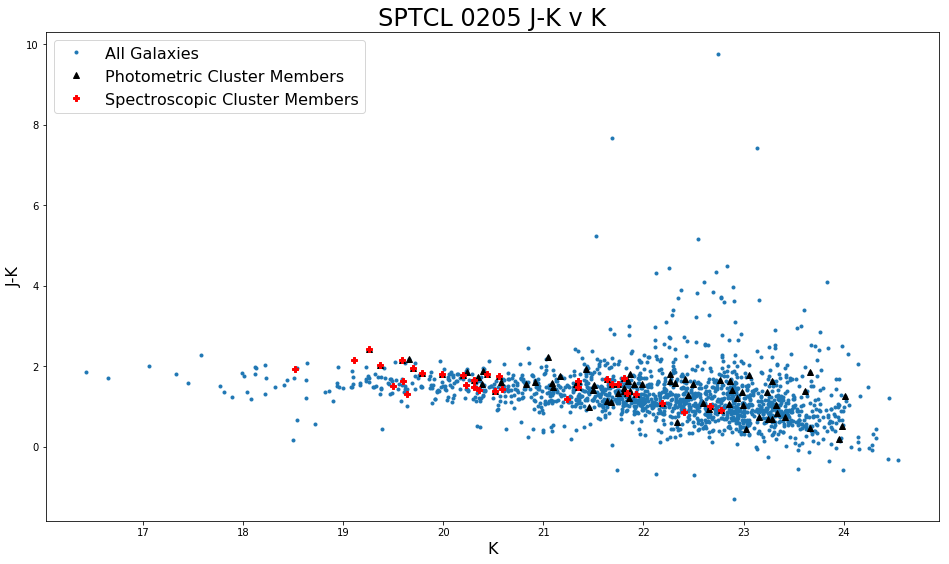

In [16]:
#Plotting the Data

#  Before getting to this point, it is important to run all cells that have data relevant to
#  What you want to plot.  

title = 'SPTCL 0205'

#  plt is what I have decided to call pyplot when I first imported the library.

# plt.figure allows you to access the properties of the figure which you are drawing on.
# You can access properties like its size, its edge characteristics, and its frame. 
# I chose a figure size (16,9)

plt.figure(figsize=(16,9))

#  Here is where the indicies produced by the where function come in handy, as I only 
#  want to plot certain data.  The pyplot tool is simply plot to plot the data.

#. ply.plot(x, y, markersize=some_size, "marker" , color = 'some color', label = "some label")

#  You can look up different types of markers to use for plotting.  For plotting an x-y graph,
#  the values used can be accessed from tuples or arrays.  If x is some array and y is some
#  array, these will be plotted based on matching indicies.  Keep in mind that these should
#. be the same length to get a proper plot.  This will produce a scatter plot.  In the 
#. following, I have plotted objects based on their mask and k_star value, as well as 
#  their photometric and spectrosctopic redshift member selection criteria.

plt.plot(KMAG[goodJK], JMINK[goodJK], '.', label="All Galaxies")
plt.plot(KMAG[i_goodJK_member], JMINK[i_goodJK_member], '^', color = 'black', label="Photometric Cluster Members")
plt.plot(KMAG[i_goodJK_member_spec], JMINK[i_goodJK_member_spec], 'P', color = 'red', label="Spectroscopic Cluster Members")

#  The title function allows you to input a string to call the plot. It also allows you to
#  alter the font size, color, and other things of the title.

plt.title(title + ' J-K v K', fontsize = 24)

#. in this plt.title example, I had already produced a string variable called title.  To fill
#  in the rest, you can add other things to the string with + and manually input a string value
#  by enclosing it with ''.  The same can be said for the xlabel and y label functions, which
#  which will control the characteristics of the x- and y-axis text.

plt.xlabel('K', fontsize = 16)
plt.ylabel('J-K', fontsize = 16)

#  The legend function allows you to produce a legend for your plots.  The names can be accessed
#. from the label variable from the plt.plot functions previously created.  Finally, in order
#  to produce a picture, you use the plt.show function:

plt.legend(fontsize=16)
plt.show()



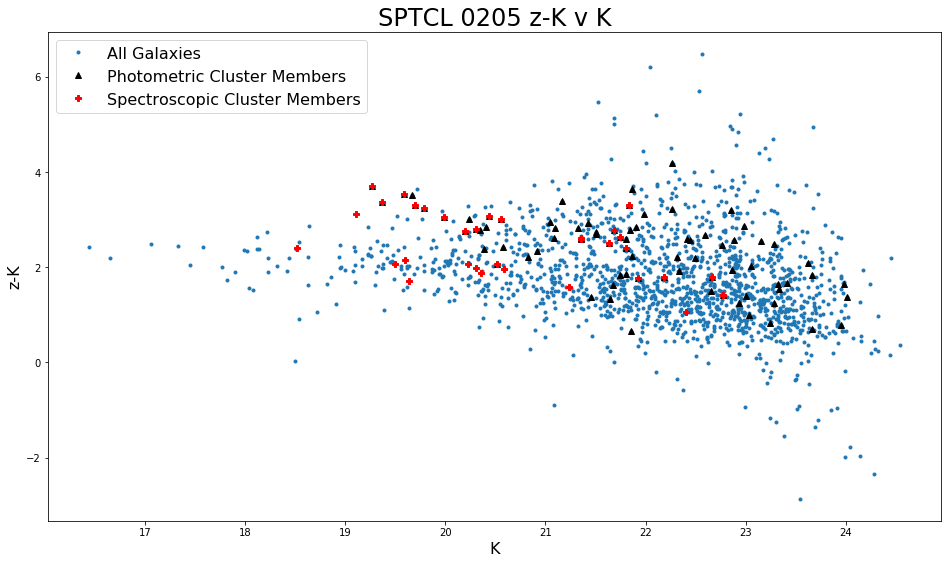

In [17]:
plt.figure(figsize=(16,9))
plt.plot(KMAG[goodzK], zMINK[goodzK], '.', label="All Galaxies")
plt.plot(KMAG[i_goodzK_member], zMINK[i_goodzK_member], '^', color = 'black', label="Photometric Cluster Members")
plt.plot(KMAG[i_goodzK_member_spec], zMINK[i_goodzK_member_spec], 'P', color = 'red', label="Spectroscopic Cluster Members")
plt.title(title + ' z-K v K', fontsize = 24)
plt.xlabel('K', fontsize = 16)
plt.ylabel('z-K', fontsize = 16)
plt.legend(fontsize=16)
plt.show()

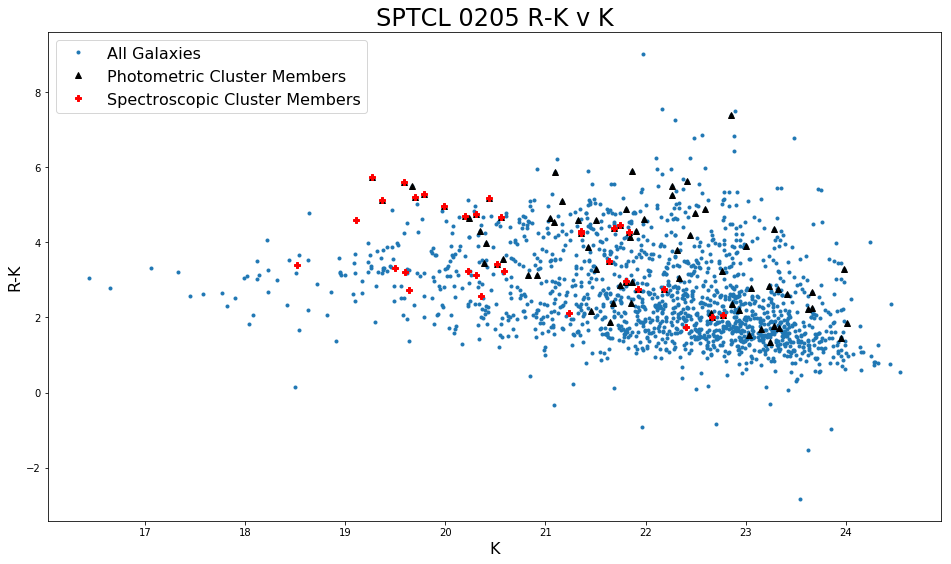

In [4]:
plt.figure(figsize=(16,9))
plt.plot(KMAG[goodRK], RMINK[goodRK], '.', label = "All Galaxies")
plt.plot(KMAG[i_goodRK_member], RMINK[i_goodRK_member], '^', color = 'black', label = "Photometric Cluster Members")
plt.plot(KMAG[i_goodRK_member_spec], RMINK[i_goodRK_member_spec], 'P', color = 'red', label="Spectroscopic Cluster Members")
plt.title(title + ' R-K v K', fontsize = 24)
plt.xlabel('K', fontsize = 16)
plt.ylabel('R-K', fontsize = 16)
plt.legend(fontsize=16)
plt.show()

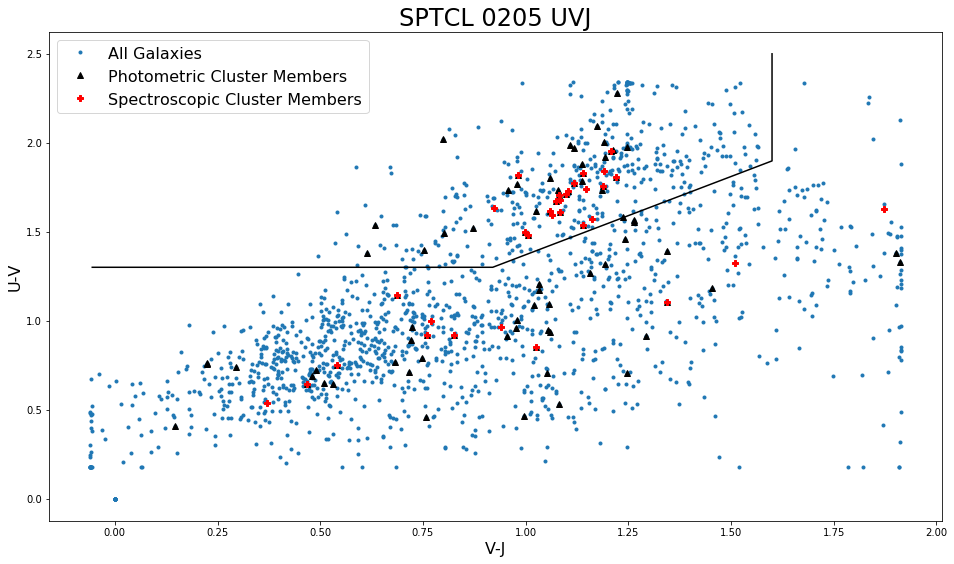

In [5]:
plt.figure(figsize=(16,9))
plt.plot(VMINJ[goodUVJ], UMINV[goodUVJ], '.', label = "All Galaxies")
plt.plot(VMINJ[i_goodUVJ_member], UMINV[i_goodUVJ_member], '^', color = 'black', label = "Photometric Cluster Members")
plt.plot(VMINJ[i_goodUVJ_member_spec], UMINV[i_goodUVJ_member_spec], 'P', color = 'red', label="Spectroscopic Cluster Members")
#The Quiescent cut based on Williams et al.
#U-V>1.3, V-J < 1.6, and (U-V)>0.88x(V-J) + 0.49
plt.plot((-0.055, 0.92, 1.6, 1.6),(1.3, 1.3, 1.898, 2.5), color = 'black')
plt.title(title + ' UVJ', fontsize = 24)
plt.xlabel('V-J', fontsize = 16)
plt.ylabel('U-V', fontsize = 16)
plt.legend(fontsize=16)
plt.show()

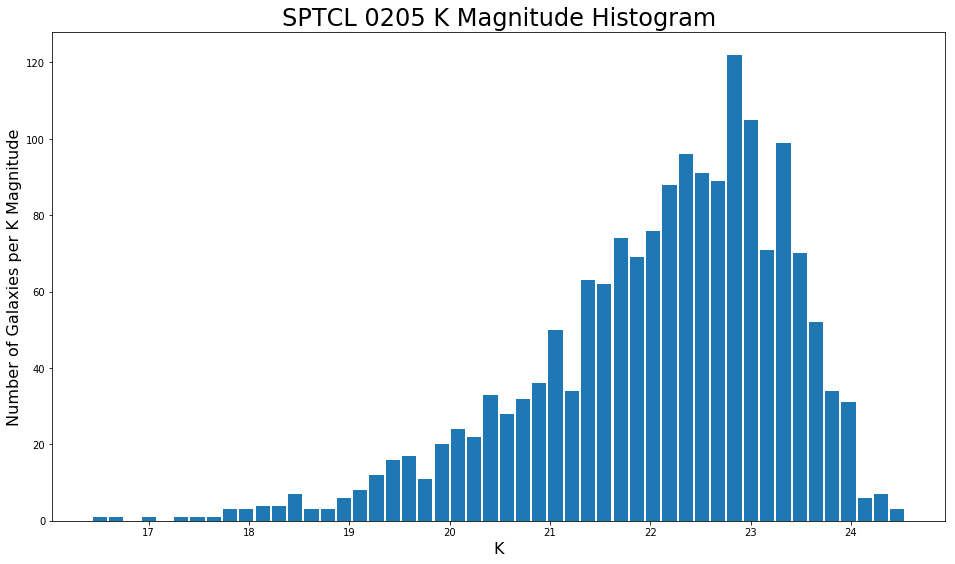

In [19]:
# To plot a histogram, you can do plt.hist instead of plt.plot.  You can also control the 
#. bin size and bin number.  In the example below, 50 is the number of bins.  Alpha controls
#. the visibility of each bin and rwidth is a value between 0-1 to control bin size.

plt.figure(figsize=(16,9))
plt.hist(KMAG[goodUVJ], 50, alpha=1, rwidth=0.875)
plt.title(title + ' K Magnitude Histogram', fontsize = 24)
plt.xlabel('K', fontsize = 16)
plt.ylabel('Number of Galaxies per K Magnitude', fontsize = 16)
plt.show()


#With this, the tutorial is complete.